In [25]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
conv_rates = {
  'class1': [1.26, 0.6, 0.45],
  'class2': [1.44, 1.04, 0.65],
  'class3': [2.17, 0.86, 0.45],
  'class4': [0.53, 0.3, 0.65]
  }

def conv_rate(x, a=1, b=1, c=1):
    return ((c*x) ** a) * np.exp(-b * c * x)

# obiettivo: massimizzare p*conv_rate(p)


In [23]:
#classe1
a, b, c = conv_rates['class1']

prices = np.linspace(5,12,10)
print(prices)

convs = conv_rate(prices, a, b, c)
rews = convs*prices

print( max(rews) )
print( np.argmax(rews) )

[ 5.          5.77777778  6.55555556  7.33333333  8.11111111  8.88888889
  9.66666667 10.44444444 11.22222222 12.        ]
4.639428056620112
4


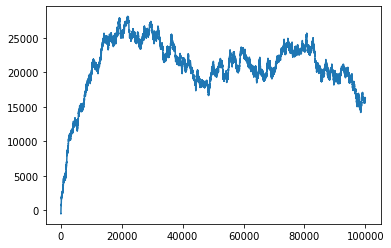

In [53]:
T = 100000

alphas = np.ones(10)
betas = np.ones(10)

rew = 0
N=100 # clienti x volta

reward_values = np.zeros(T)
regrets = np.zeros(T)

clairvoyant = max(rews)
arms = np.zeros(T,dtype=int)

for i in range(T):

  # choose the arm

  preds = prices*np.random.beta(alphas,betas)
  arm = np.argmax(preds)
  arms[i]=arm

  # pull the arm

  succ = np.random.binomial(N,convs[arm])
  rew = rew+succ*prices[arm]

  # update parameters

  alphas[arm] += succ
  betas[arm] += (N-succ)
  reward_values[i] = rew
  regrets[i] = N*i*clairvoyant-rew


plt.plot(regrets)





4


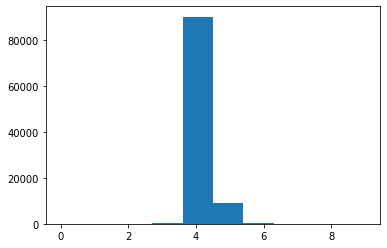

In [54]:
plt.hist(arms)
print( np.argmax(rews) )